# Метод Ньютона


In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def f(x):
    return x[0] ** 4 + 2 * x[1] ** 2 + x[0] ** 2 * x[1] ** 2 + 2 * x[0] + x[1]

# f'(x)
def f_grad(x):
    return np.array([4 * x[0] ** 3 + 2 * x[0] * x[1] ** 2 + 2, 
                     4 * x[1] + 2 * x[0] ** 2 * x[1] + 1])

# f''(x)
def f_hess(x):
    return np.array([[12 * x[0] ** 2 + 2 * x[1] ** 2,
                      4 * x[1] * x[0]],
                     [4 * x[0] * x[1],
                      4 + 2 * x[0] ** 2]])

In [24]:
def Newton(f, x0, epsilon):
    # возвращает массив иксов и массив значений функции на всех итерациях
    
    x1 = x0 - np.dot(np.linalg.inv(f_hess(x0)), f_grad(x0))
    f0 = f(x0)
    f1 = f(x1)
    
    x_min_arr = np.vstack([x0, x1])
    f_min_arr = np.array([f0, f1])
    
    while np.linalg.norm(x0 - x1) > epsilon:
        x0 = x1
        x1 = x0 - np.dot(np.linalg.inv(f_hess(x0)), f_grad(x0))
        f0 = f(x0)
        f1 = f(x1)
        x_min_arr = np.vstack([x_min_arr, x1])
        f_min_arr = np.append(f_min_arr, f1)
        
    return x_min_arr, f_min_arr  

Итерации нахождения минимума с начальным приближением в точке x = [0.45 0.35] и epsilon = 1e-05
iter 0: x = [0.45 0.35], f = 1.5608125
iter 1: x = [-0.36675595 -0.11020289], f = -0.7996989452402077
iter 2: x = [-1.45339668 -0.19309409], f = 1.5155161880744143
iter 3: x = [-1.04545727 -0.17726312], f = -0.9763821092797742
iter 4: x = [-0.84493514 -0.18568557], f = -1.2723072184748443
iter 5: x = [-0.79002645 -0.19058424], f = -1.285769160570753
iter 6: x = [-0.7860605 -0.1909936], f = -1.2858282911440562
iter 7: x = [-0.78604058 -0.19099571], f = -1.2858282926162068
iter 8: x = [-0.78604058 -0.19099571], f = -1.2858282926162068

Итерации нахождения минимума с начальным приближением в точке x = [0.2 0.1] и epsilon = 1e-05
iter 0: x = [0.2 0.1], f = 0.522
iter 1: x = [-3.82942565 -0.16608969], f = 207.68234613478472
iter 2: x = [-2.56408289 -0.12659168], f = 38.106980297863984
iter 3: x = [-1.73412406 -0.12114907], f = 5.527262949479894
iter 4: x = [-1.20999286 -0.14383864], f = -0.348615

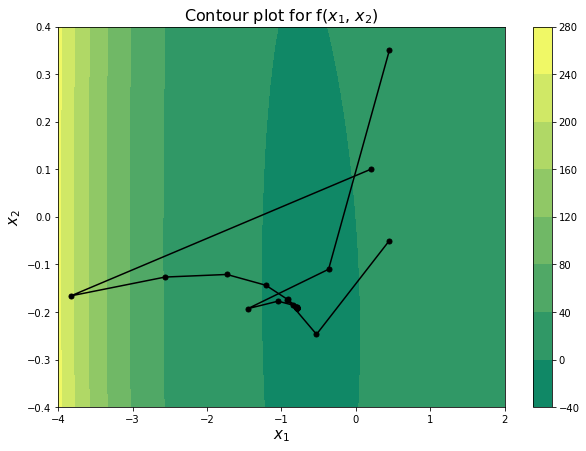

In [36]:
x0 = np.array([[0.45, 0.35], [0.2, 0.1], [0.45, -0.05]])   # начальные приближения
epsilon = 0.00001

xx = np.linspace(-4, 2, 100)
yy = np.linspace(-0.4, 0.4, 100)

X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])

plt.figure(figsize=(10, 7))
plt.contourf(X, Y, Z, cmap='summer')
plt.colorbar()
plt.title('Contour plot for f($x_{1}$, $x_{2}$)', fontsize=16)
plt.xlabel('$x_{1}$', fontsize=15)
plt.ylabel('$x_{2}$', fontsize=15)

for init_appr in x0:
    x_min_arr, f_min_arr = Newton(f, init_appr, epsilon)
    plt.plot(x_min_arr[:, 0], x_min_arr[:, 1], 'ko-', markersize=5)
    print(f'Итерации нахождения минимума с начальным приближением в точке x = {init_appr} и epsilon = {epsilon}')
    for i in range(x_min_arr.shape[0]):
        print(f'iter {i}: x = {x_min_arr[i]}, f = {f_min_arr[i]}')
    print()